# Iris Flower Dataset
Toy  Dataset: [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
Source : https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
* A simple dataset to apply logistic regression.
* 3 flowers of Iris species. [see the images on wikipedia linkn above] 
* 1936 by Ronald Fisher.
* [Petal and Sepal](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png)
* Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.


## Data Description:
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.

**No. of datapoints:** 50\
**No. of features:** 4\
**No. of attribures:** 5(including the class attribute)

## Attribute Information:
1. Sepal length, petal length, sepal width and petal width of the flowers
2. Species of the flower
    * Setosa
    * Versicolor
    * Virginica

In [7]:
#importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df= sns.load_dataset("iris")  #importing dataset and making dataframe 
df.head() #showing top 5 data entry 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.describe() #describes are data 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.shape #tells us about no. of rows and column [rows , columns]

(150, 5)

# Data Visualization

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='species'>

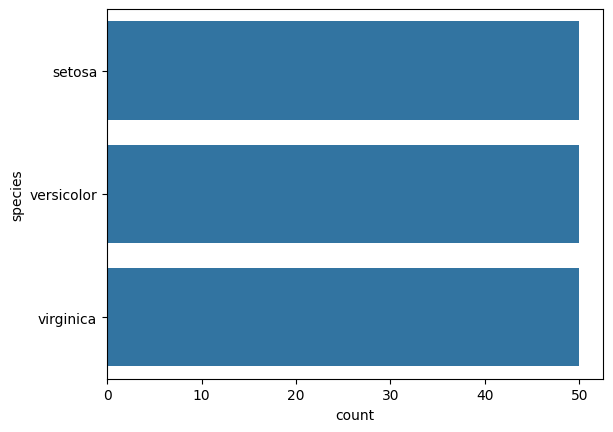

In [15]:
print(df["species"].value_counts())
sns.countplot(df["species"])

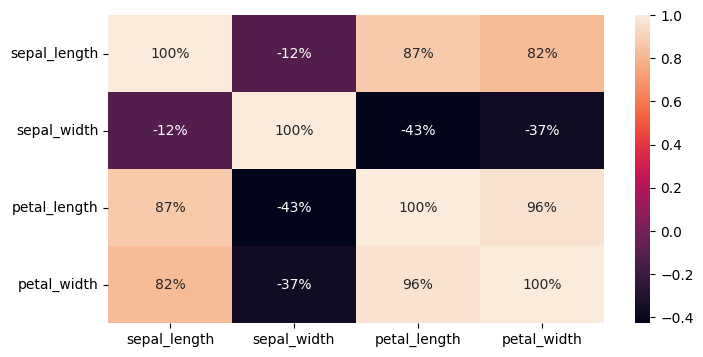

In [17]:
plt.figure(figsize=(8,4)) 
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()


#### Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.****

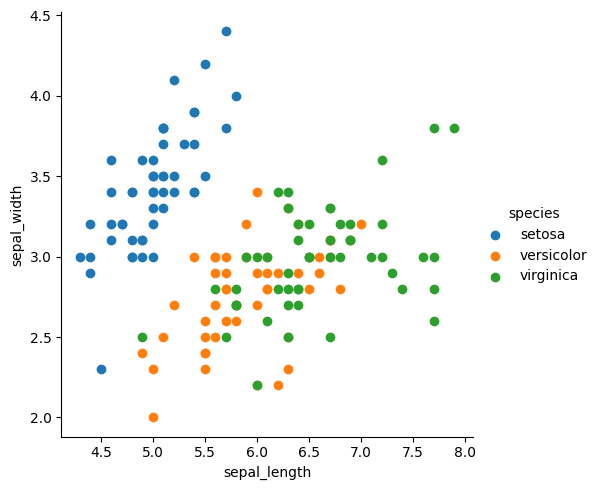

In [20]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

<Figure size 1500x300 with 0 Axes>

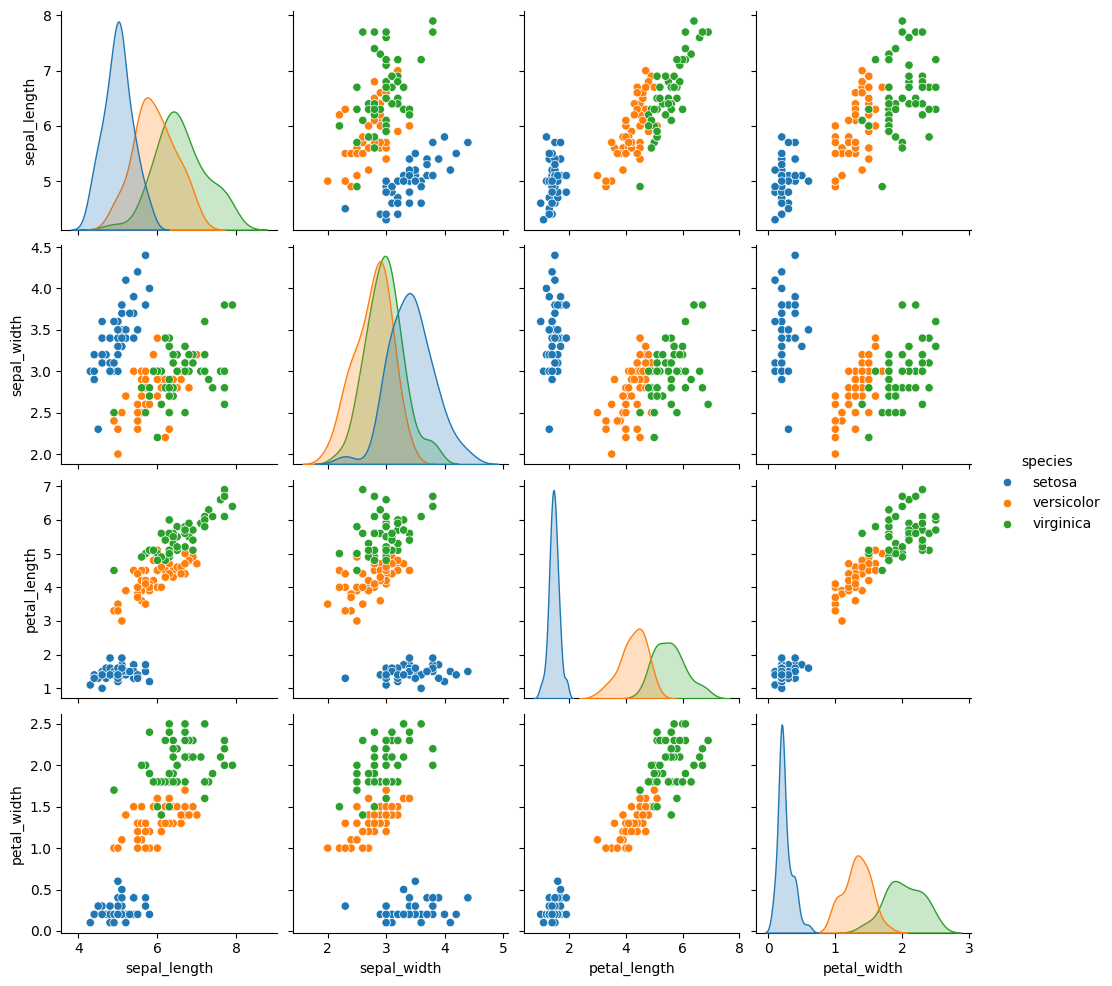

In [30]:
#let Create a pair plot of some columns
plt.figure(figsize=(15,3));
sns.pairplot(df.iloc[:,:],hue='species')  # graph also  tell us about the the realationship between the two columns 
plt.show()

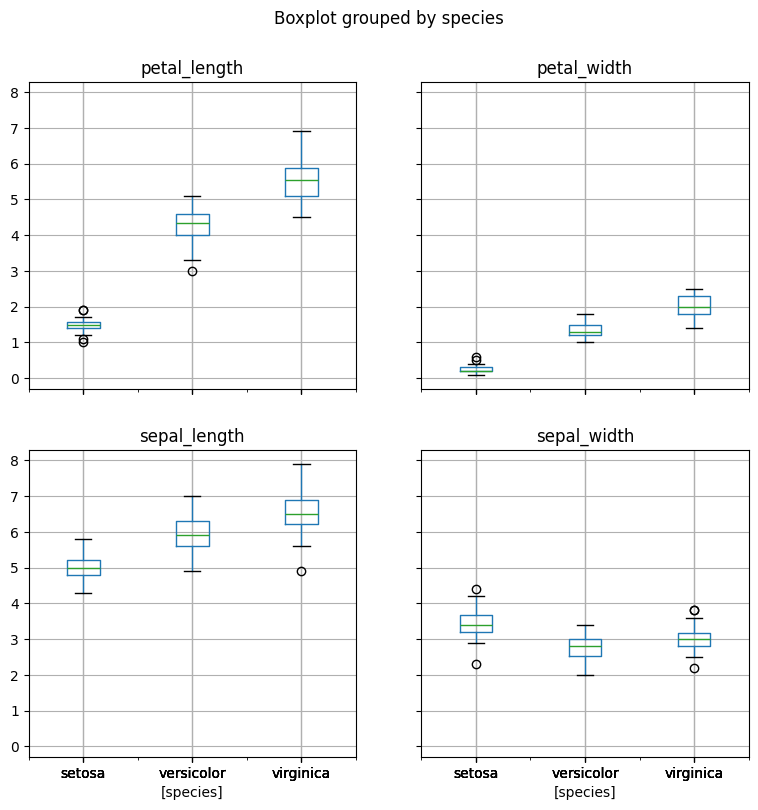

In [36]:
# We can quickly make a boxplot with Pandas on each feature split out by species
df.boxplot(by="species", figsize=(9,9));

### Steps To Be followed When Applying an Algorithm
* Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model   better.
* Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
* Then pass the training dataset to the algorithm to train it. We use the .fit() method
* Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
* We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [38]:
# importing alll the necessary packages to Logistic Regression 
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

### Splitting The Data into Training And Testing Dataset

In [40]:
X=df.iloc[:,0:4]
Y=df["species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


## Logistic Regression

In [43]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158
